In [3]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import getpass
from collections import Counter
from sqlalchemy import create_engine

# Preprocessing
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ML Models
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier

# Metrics
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

# Sampling
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import ClusterCentroids

In [5]:
# Enter password for connection string
password = getpass.getpass()

········


In [6]:
# Create connection string
conn_string = "postgresql://postgres:" + password + "@b-team-final-project.cct7ahzel1ur.us-west-2.rds.amazonaws.com:5432/B_Team_Final_Project"

In [7]:
# Create the connection
conn=create_engine(conn_string)

In [8]:
# Import health_outcomes table and drop "countyfips"
health_outcomes = pd.read_sql(
    'health_outcomes',
    conn
)
health_outcomes = health_outcomes.apply(pd.to_numeric)
health_outcomes = health_outcomes.drop("countyfips", axis=1)
health_outcomes

,arthritis,casthma,bphigh,cancer,highchol,kidney,copd,chd,depression,diabetes,obesity,teethlost,stroke
0,23.0,9.7,34.1,6.1,31.3,3.1,7.1,6.3,21.2,11.8,36.3,18.8,3.3
1,25.6,9.5,33.3,6.5,29.3,2.9,8.0,6.4,21.2,10.7,38.8,17.2,3.4
2,23.7,9.7,32.9,6.4,30.4,2.9,6.7,5.8,19.0,11.0,37.0,17.2,3.1
3,20.0,9.2,29.8,6.0,27.8,2.5,5.0,4.8,17.0,8.3,30.7,12.2,2.7
4,25.7,10.5,36.0,6.6,30.0,3.0,8.4,6.8,23.9,10.5,36.5,20.6,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,34.1,11.0,41.0,7.0,33.6,3.3,11.8,8.3,28.4,13.1,42.1,27.7,4.2
3117,24.6,9.3,36.4,6.4,32.5,2.6,5.9,5.3,21.6,10.6,37.8,14.2,3.1
3118,19.4,9.6,27.0,6.1,27.1,2.5,5.7,5.1,15.8,9.8,29.8,15.3,2.7
3119,22.9,9.4,29.6,6.3,28.2,2.6,5.8,5.2,19.7,9.7,35.7,14.1,2.8


In [9]:
# Import health_risk_behaviors table and drop "countyfips"
risk_df = pd.read_sql(
    'cancer_health_risk_merged',
    conn
)
risk_df = risk_df.apply(pd.to_numeric)
risk_df = risk_df.drop(columns=["countyfips", "cancer"], axis=1)
risk_df


,density,total_population,binge,csmoking,lpa,sleep
0,94.3,56059,15.0,19.7,32.2,38.4
1,141.8,225463,19.0,19.9,27.6,36.4
2,27.8,24575,13.7,27.8,41.6,40.9
3,36.0,22427,15.6,25.2,37.7,40.1
4,89.9,57997,15.7,22.2,33.3,38.8
...,...,...,...,...,...,...
3116,4.0,42226,16.9,17.0,25.2,35.4
3117,5.9,23376,17.5,11.3,18.5,27.1
3118,9.7,20194,17.1,18.8,27.8,35.9
3119,3.5,7793,18.0,17.6,25.9,32.4


In [10]:
# Import prevention table and drop "countyfips"
prev_df =  pd.read_sql(
    'prevention',
    conn
)
prev_df = prev_df.apply(pd.to_numeric)
prev_df = prev_df.drop("countyfips", axis=1)
prev_df

,access,checkup,dental,bpmed,cholscreen,mammouse,cervical,colon_screen,corem,corew
0,24.2,74.1,61.1,57.9,83.8,71.5,83.0,58.7,25.2,23.7
1,18.9,73.4,57.8,56.8,83.0,68.7,82.2,61.2,24.7,20.6
2,20.5,72.6,59.3,56.8,82.1,69.0,82.6,58.4,24.4,22.3
3,13.6,68.8,68.5,48.5,81.2,67.4,84.1,58.4,20.8,25.1
4,20.5,74.5,58.3,57.7,82.8,69.6,82.3,54.6,25.5,27.2
...,...,...,...,...,...,...,...,...,...,...
3116,13.1,79.6,46.9,63.9,87.3,70.6,82.5,63.3,25.9,23.1
3117,18.3,78.9,55.8,63.2,86.8,67.3,87.2,63.1,29.0,21.4
3118,15.0,80.1,67.5,57.7,87.3,76.5,85.5,62.5,17.3,20.2
3119,18.0,74.3,63.4,56.2,83.2,73.4,84.0,59.5,24.6,26.5


In [11]:
# Create a list of high risk cancer counties
cancer_risk = []
for risk in health_outcomes["cancer"]:
    if risk <= 6.96:
        cancer_risk.append("normal_risk")
    if risk > 6.96:
        cancer_risk.append("high_risk")
Counter(cancer_risk)

Counter({'normal_risk': 3089, 'high_risk': 32})

In [12]:
# Append the list as a column to health_outcomes
health_outcomes["cancer_risk"] = cancer_risk
health_outcomes

,arthritis,casthma,bphigh,cancer,highchol,kidney,copd,chd,depression,diabetes,obesity,teethlost,stroke,cancer_risk
0,23.0,9.7,34.1,6.1,31.3,3.1,7.1,6.3,21.2,11.8,36.3,18.8,3.3,normal_risk
1,25.6,9.5,33.3,6.5,29.3,2.9,8.0,6.4,21.2,10.7,38.8,17.2,3.4,normal_risk
2,23.7,9.7,32.9,6.4,30.4,2.9,6.7,5.8,19.0,11.0,37.0,17.2,3.1,normal_risk
3,20.0,9.2,29.8,6.0,27.8,2.5,5.0,4.8,17.0,8.3,30.7,12.2,2.7,normal_risk
4,25.7,10.5,36.0,6.6,30.0,3.0,8.4,6.8,23.9,10.5,36.5,20.6,3.5,normal_risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,34.1,11.0,41.0,7.0,33.6,3.3,11.8,8.3,28.4,13.1,42.1,27.7,4.2,high_risk
3117,24.6,9.3,36.4,6.4,32.5,2.6,5.9,5.3,21.6,10.6,37.8,14.2,3.1,normal_risk
3118,19.4,9.6,27.0,6.1,27.1,2.5,5.7,5.1,15.8,9.8,29.8,15.3,2.7,normal_risk
3119,22.9,9.4,29.6,6.3,28.2,2.6,5.8,5.2,19.7,9.7,35.7,14.1,2.8,normal_risk


In [13]:
# Define X and y
X = prev_df.values
y = health_outcomes["cancer_risk"].values.reshape(-1,1)

In [14]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2)

# RESAMPLING PREVENTATIVE SERVICES VS CANCER

## SMOTEEN


In [15]:
# Instantiate a SMOTEEN class
smote_enn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smote_enn.fit_resample(X_train,y_train)
Counter(y_resampled)

Counter({'high_risk': 2313, 'normal_risk': 2225})

In [16]:
# Scale the data
#scaler = StandardScaler()
#X_train_scaled_resampled = scaler.fit_transform(X_resampled)
#X_test_scaled_resampled = scaler.transform(X_train_scaled_resampled)

In [17]:
#shapes of splitted data
print("X_train:",X_resampled.shape)
print("X_test:",X_test.shape)
print("Y_train:",y_resampled.shape)
print("Y_test:",y_test.shape)

X_train: (4538, 10)
X_test: (781, 10)
Y_train: (4538,)
Y_test: (781, 1)


In [18]:
# Train a logistic regression model using resampled data
model = LogisticRegression(solver='lbfgs', random_state=1, max_iter=1000)
model.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000, random_state=1)

In [19]:
# get predictions
y_pred = model.predict(X_test)
y_pred[:5]

array(['normal_risk', 'normal_risk', 'normal_risk', 'normal_risk',
       'normal_risk'], dtype=object)

In [20]:
# Print the accuracy score
Accuracy = balanced_accuracy_score(y_test,y_pred)
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 0.75


In [21]:
# Display a confusion matrix
confusion_matrix(y_test, y_pred)

array([[  5,   3],
       [ 91, 682]], dtype=int64)

In [22]:
# print a classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.05      0.62      0.88      0.10      0.74      0.54         8
normal_risk       1.00      0.88      0.62      0.94      0.74      0.57       773

avg / total       0.99      0.88      0.63      0.93      0.74      0.57       781



## SMOTE

In [23]:
# Resample the training data with SMOTE
X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy='auto').fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({'normal_risk': 2316, 'high_risk': 2316})

In [24]:
#shapes of splitted data
print("X_train:",X_resampled.shape)
print("X_test:",X_test.shape)
print("Y_train:",y_resampled.shape)
print("Y_test:",y_test.shape)

X_train: (4632, 10)
X_test: (781, 10)
Y_train: (4632,)
Y_test: (781, 1)


In [25]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver="lbfgs", random_state=1, max_iter=1000)
model.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000, random_state=1)

In [26]:
# Print the accuracy score
Accuracy = balanced_accuracy_score(y_test,y_pred)
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 0.75


In [27]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[  5,   3],
       [ 91, 682]], dtype=int64)

In [28]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.05      0.62      0.88      0.10      0.74      0.54         8
normal_risk       1.00      0.88      0.62      0.94      0.74      0.57       773

avg / total       0.99      0.88      0.63      0.93      0.74      0.57       781



## ClusterCentroids

In [29]:
cc = ClusterCentroids(random_state=1)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({'high_risk': 24, 'normal_risk': 24})

In [30]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1, max_iter=1000)
model.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000, random_state=1)

In [31]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
balanced_accuracy

0.7258247089262613

In [32]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[  5,   3],
       [134, 639]], dtype=int64)

In [33]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.04      0.62      0.83      0.07      0.72      0.51         8
normal_risk       1.00      0.83      0.62      0.90      0.72      0.53       773

avg / total       0.99      0.82      0.63      0.89      0.72      0.53       781



# ENSEMBLE LEARNERS - PREVENTATIVE SERVICES VS CANCER

## BALANCED RANDOM FOREST CLASSIFIER

In [34]:
# Define X and y
X = prev_df.values
y = health_outcomes["cancer_risk"].values

In [35]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2)

In [36]:
brf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
brf_model.fit(X_train, y_train)
Counter(y_train)

Counter({'normal_risk': 2316, 'high_risk': 24})

In [37]:
# Calculated the balanced accuracy score
y_pred = brf_model.predict(X_test)
acc_score = balanced_accuracy_score(y_test, y_pred)
acc_score

0.8618208279430789

In [38]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[  7,   1],
       [117, 656]], dtype=int64)

In [39]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.06      0.88      0.85      0.11      0.86      0.74         8
normal_risk       1.00      0.85      0.88      0.92      0.86      0.74       773

avg / total       0.99      0.85      0.87      0.91      0.86      0.74       781



In [40]:
# List the features sorted in descending order by feature importance
importances = brf_model.feature_importances_
sorted(zip(importances, prev_df.columns), reverse=True)

[(0.16133474550812157, 'checkup'),
 (0.15379810449481965, 'access'),
 (0.14109135980253165, 'cholscreen'),
 (0.12766649221494697, 'bpmed'),
 (0.10431499243348975, 'colon_screen'),
 (0.0757459451582132, 'dental'),
 (0.07402469064877108, 'cervical'),
 (0.06548591210729723, 'corem'),
 (0.057395816633757556, 'corew'),
 (0.03914194099805126, 'mammouse')]

## EASY ENSEMBLE ADABOOST CLASSIFIER

In [41]:
# Instantiate and train the classifier
eec = EasyEnsembleClassifier(n_estimators=100, random_state=1)
eec.fit(X_train, y_train)

EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [42]:
# Calculated the balanced accuracy score
y_pred = eec.predict(X_test)
acc_score = balanced_accuracy_score(y_test, y_pred)
acc_score

0.8521183699870634

In [43]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[  7,   1],
       [132, 641]], dtype=int64)

In [44]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.05      0.88      0.83      0.10      0.85      0.73         8
normal_risk       1.00      0.83      0.88      0.91      0.85      0.72       773

avg / total       0.99      0.83      0.87      0.90      0.85      0.72       781



# ALL DATA VS CANCER

In [45]:
# Merging all of the DataFrames.

# Join the two DataFrames on Index
risk_outcome_df = health_outcomes.merge(risk_df, left_index=True, right_index=True)
risk_outcome_df

,arthritis,casthma,bphigh,cancer,highchol,kidney,copd,chd,depression,diabetes,obesity,teethlost,stroke,cancer_risk,density,total_population,binge,csmoking,lpa,sleep
0,23.0,9.7,34.1,6.1,31.3,3.1,7.1,6.3,21.2,11.8,36.3,18.8,3.3,normal_risk,94.3,56059,15.0,19.7,32.2,38.4
1,25.6,9.5,33.3,6.5,29.3,2.9,8.0,6.4,21.2,10.7,38.8,17.2,3.4,normal_risk,141.8,225463,19.0,19.9,27.6,36.4
2,23.7,9.7,32.9,6.4,30.4,2.9,6.7,5.8,19.0,11.0,37.0,17.2,3.1,normal_risk,27.8,24575,13.7,27.8,41.6,40.9
3,20.0,9.2,29.8,6.0,27.8,2.5,5.0,4.8,17.0,8.3,30.7,12.2,2.7,normal_risk,36.0,22427,15.6,25.2,37.7,40.1
4,25.7,10.5,36.0,6.6,30.0,3.0,8.4,6.8,23.9,10.5,36.5,20.6,3.5,normal_risk,89.9,57997,15.7,22.2,33.3,38.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,34.1,11.0,41.0,7.0,33.6,3.3,11.8,8.3,28.4,13.1,42.1,27.7,4.2,high_risk,4.0,42226,16.9,17.0,25.2,35.4
3117,24.6,9.3,36.4,6.4,32.5,2.6,5.9,5.3,21.6,10.6,37.8,14.2,3.1,normal_risk,5.9,23376,17.5,11.3,18.5,27.1
3118,19.4,9.6,27.0,6.1,27.1,2.5,5.7,5.1,15.8,9.8,29.8,15.3,2.7,normal_risk,9.7,20194,17.1,18.8,27.8,35.9
3119,22.9,9.4,29.6,6.3,28.2,2.6,5.8,5.2,19.7,9.7,35.7,14.1,2.8,normal_risk,3.5,7793,18.0,17.6,25.9,32.4


In [46]:
# Join the third dataset in
combined_data_df = risk_outcome_df.merge(prev_df, left_index=True, right_index=True)
combined_data_df = combined_data_df.drop(columns=["cancer"])
combined_data_df

,arthritis,casthma,bphigh,highchol,kidney,copd,chd,depression,diabetes,obesity,...,access,checkup,dental,bpmed,cholscreen,mammouse,cervical,colon_screen,corem,corew
0,23.0,9.7,34.1,31.3,3.1,7.1,6.3,21.2,11.8,36.3,...,24.2,74.1,61.1,57.9,83.8,71.5,83.0,58.7,25.2,23.7
1,25.6,9.5,33.3,29.3,2.9,8.0,6.4,21.2,10.7,38.8,...,18.9,73.4,57.8,56.8,83.0,68.7,82.2,61.2,24.7,20.6
2,23.7,9.7,32.9,30.4,2.9,6.7,5.8,19.0,11.0,37.0,...,20.5,72.6,59.3,56.8,82.1,69.0,82.6,58.4,24.4,22.3
3,20.0,9.2,29.8,27.8,2.5,5.0,4.8,17.0,8.3,30.7,...,13.6,68.8,68.5,48.5,81.2,67.4,84.1,58.4,20.8,25.1
4,25.7,10.5,36.0,30.0,3.0,8.4,6.8,23.9,10.5,36.5,...,20.5,74.5,58.3,57.7,82.8,69.6,82.3,54.6,25.5,27.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,34.1,11.0,41.0,33.6,3.3,11.8,8.3,28.4,13.1,42.1,...,13.1,79.6,46.9,63.9,87.3,70.6,82.5,63.3,25.9,23.1
3117,24.6,9.3,36.4,32.5,2.6,5.9,5.3,21.6,10.6,37.8,...,18.3,78.9,55.8,63.2,86.8,67.3,87.2,63.1,29.0,21.4
3118,19.4,9.6,27.0,27.1,2.5,5.7,5.1,15.8,9.8,29.8,...,15.0,80.1,67.5,57.7,87.3,76.5,85.5,62.5,17.3,20.2
3119,22.9,9.4,29.6,28.2,2.6,5.8,5.2,19.7,9.7,35.7,...,18.0,74.3,63.4,56.2,83.2,73.4,84.0,59.5,24.6,26.5


## RANDOM FOREST CLASSIFIER

In [47]:
# Define X and y
X = combined_data_df.drop(columns=["cancer_risk"]).values
y = combined_data_df["cancer_risk"].values

In [48]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2)

In [49]:
brf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
brf_model.fit(X_train, y_train)
Counter(y_train)

Counter({'normal_risk': 2316, 'high_risk': 24})

In [50]:
# Calculated the balanced accuracy score
y_pred = brf_model.predict(X_test)
acc_score = balanced_accuracy_score(y_test, y_pred)
acc_score

0.8721701164294955

In [51]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[  7,   1],
       [101, 672]], dtype=int64)

In [52]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.06      0.88      0.87      0.12      0.87      0.76         8
normal_risk       1.00      0.87      0.88      0.93      0.87      0.76       773

avg / total       0.99      0.87      0.87      0.92      0.87      0.76       781



In [56]:
# List the features sorted in descending order by feature importance
importances = brf_model.feature_importances_
importances = np.round(importances, 5)
sorted(zip(importances, combined_data_df.drop(columns=["cancer_risk"]).columns), reverse=True)

[(0.11218, 'depression'),
 (0.10551, 'arthritis'),
 (0.08268, 'access'),
 (0.07868, 'copd'),
 (0.06013, 'casthma'),
 (0.05333, 'checkup'),
 (0.05165, 'cholscreen'),
 (0.04967, 'chd'),
 (0.0475, 'colon_screen'),
 (0.03647, 'binge'),
 (0.03455, 'bpmed'),
 (0.02575, 'bphigh'),
 (0.02456, 'highchol'),
 (0.02357, 'diabetes'),
 (0.02227, 'teethlost'),
 (0.02209, 'corew'),
 (0.0215, 'dental'),
 (0.02096, 'total_population'),
 (0.01742, 'cervical'),
 (0.01727, 'corem'),
 (0.01726, 'mammouse'),
 (0.01573, 'density'),
 (0.01418, 'sleep'),
 (0.01397, 'lpa'),
 (0.01141, 'kidney'),
 (0.00673, 'csmoking'),
 (0.00659, 'stroke'),
 (0.00639, 'obesity')]

[]

<Figure size 300x400 with 0 Axes>

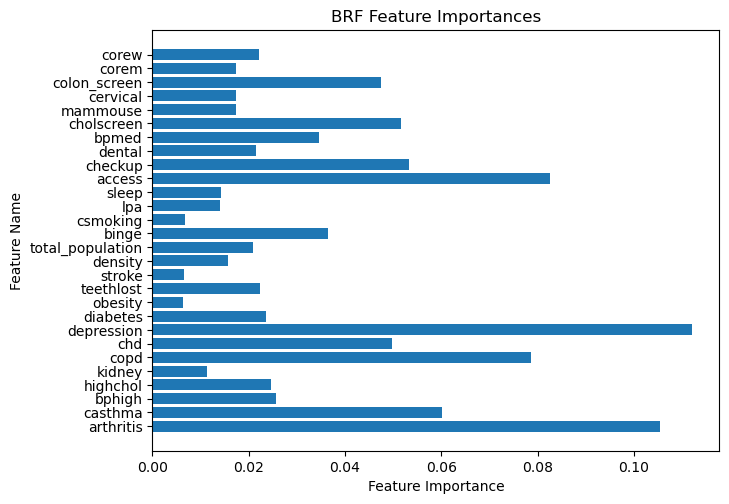

In [60]:
# Create a horizontal barchart of feature importances

#set labels and ticks
y_pos = np.arange(len(importances))
Y_labels = combined_data_df.drop("cancer_risk", axis=1).columns

# Create the chart
plt.rcdefaults()
plt.figure(figsize=(3,4))
fig, ax = plt.subplots()
plt.tight_layout()
ax.barh([x for x in range(len(importances))], importances, align='center', )
ax.set_yticks(y_pos, labels=Y_labels)
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature Name')
ax.set_title('BRF Feature Importances')
plt.plot()